<a href="https://colab.research.google.com/github/lemcat55/w3StatCalc/blob/main/Week3_Normal_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to use this application
To use this application, you have to be signed in one of your Google accounts (e.g., keep your Gmail open while working with Colab).
1.	Click the white triangle inside the black circle in the cell [1]. It is a one-time operation for the entire session - no matter how many problems you are going to solve. This operation loads necessary libraries and defines two functions that will be used for graphing results. As an alternative, you can click Run All in Runtime section of the menu at the top of the application.
2.	In Table of contents (on the left side of the application), find the type of the problem you are solving, for example, "Find P(X < x1) for given x1" and click that item. It will bring you to the code for the problem. 
You do not need to understand the code; you just need to enter your input data in first few lines of the code (between two lines ############). 
The variable N denotes the size of a population, the variable n – the size of a sample. If N is unknown, use N=None; if your problem deals only with a population (not with a sample), use n=None. 
Run the code by clicking the white triangle inside the black circle of the code’s cell. The graphical and numerical results will be displayed.
3.	To solve the next problem, go to point 2 of this instruction.



# 1: Define functions for graphing the results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
def g(mean,std,clr,x1,x2):
  i1=0
  i2=600
  left=mean-3*std
  right=mean+3*std
  x=np.linspace(left,right,i2+1)
  deltaX=6*std/i2
  y1=stats.norm.pdf(x,mean,std)
  y=y1.copy()


  if x1==None:
    i2=int((x2-left)/deltaX)
    if i2>600: i2=600
    #print("i2=",i2)
    y1[0:i2:1]=0  
  elif x2==None:
    i1=int((x1-left)/deltaX)
    if i1<0: i1=0
    y1[i1:600:1]=0
  else:
    i1=int((x1-left)/deltaX)
    if i1<0: i1=0
    i2=int((x2-left)/deltaX)
    if i2>600: i2=600
    y1[0:i1:1]=0
    y1[i2:600:1]=0

  y2=0*x
  plt.rcParams["figure.figsize"]=(4,2)
  plt.fill_between(x, y1, step="pre", alpha=1, color=clr)
  plt.fill_between(x, y2, step="pre", alpha=1, color=clr)
  plt.plot(x, y1, drawstyle="steps", color="white")
  plt.plot(x, y2, drawstyle="steps", color="white")
  plt.plot(x,y)

def f(mean,std,clr,P,side):
  if side=="left":
    x1=stats.norm.ppf(P,loc=mean,scale=std)
    x2=None
  elif side=="right":
    x1=None
    x2=stats.norm.ppf(1-P,loc=mean,scale=std)
  else:#midle
    x1=stats.norm.ppf((1-P)/2,loc=mean,scale=std)
    x2=stats.norm.ppf((1+P)/2,loc=mean,scale=std)
  
  g(mean,std,clr,x1,x2)

# 2: Find P(X < x1) for given x1

exact solution: P( X < 185 )= 0.06680720126885807
with rounded z: P( X < 185 )= 0.0668


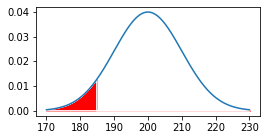

In [ ]:
##  Enter your data #################
mean=200
std=10
x1=185
n=None
N=None
############
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",x1,None)
print("exact solution: P( X <",x1,")=",stats.norm.cdf(x1,mean,std))
z1=(x1-mean)/std
z1=np.round(z1,2)
print("with rounded z: P( X <",x1,")=",np.round(stats.norm.cdf(z1,0,1),4))

# 3: Find P(X > x2) for given x2

exact solution: P( X < 272 )= 0.9121372764071188
with rounded z: P( X < 272 )= 0.9115


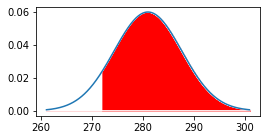

In [ ]:
##  Enter your data #################
mean=281
std=47
x2=272
n=50
N=None
############
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",None,x2)
print("exact solution: P( X <",x2,")=",1-stats.norm.cdf(x2,mean,std))
z2=(x2-mean)/std
z2=np.round(z2,2)
print("with rounded z: P( X <",x2,")=",np.round(1-stats.norm.cdf(z2,0,1),4))

# 4: Find P(x1 < X < x2) for given x1 and x2

exact solution: P( 46.5 < X < 53.5 )= 0.9544997361036416
with rounded z: P( 46.5 < X < 53.5 )= 0.9544


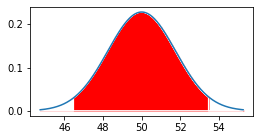

In [ ]:
##  Enter your data #################
mean=50
std=14
x1=46.5
x2=53.5
n=64
N=None
############
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",x1,x2)
P2=stats.norm.cdf(x2,mean,std)
P1=stats.norm.cdf(x1,mean,std)
print("exact solution: P(",x1,"< X <",x2,")=",P2-P1)
z1=(x1-mean)/std
z1=np.round(z1,2)
z2=(x2-mean)/std
z2=np.round(z2,2)
P2=np.round(stats.norm.cdf(z2,0,1),4)
P1=np.round(stats.norm.cdf(z1,0,1),4)
print("with rounded z: P(",x1,"< X <",x2,")=",np.round((P2-P1),4))

# 5: Find x1 for given P1=P(X < x1)

exact solution: x1 = 156.78722636740176
with rounded z: x1 = 156.8


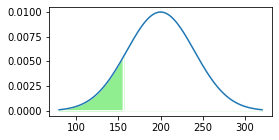

In [ ]:
##  Enter your data #################
mean=200
std=40
P1=0.14
n=None
N=None
#################
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P1,"left")
x1=stats.norm.ppf(P1,loc=mean,scale=std)
print("exact solution: x1 =",x1)
z1=(x1-mean)/std
z1=np.round(z1,2)
x1=z1*std+mean
print("with rounded z: x1 =",x1)

#6: Find x2 for given P2=P(X > x2)

exact solution: x2 = 394.933057937284
with rounded z: x2 = 395.0


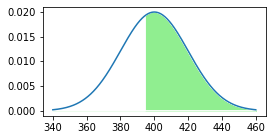

In [ ]:
##  Enter your data #################
mean=400
std=20
P2=0.60
n=None
N=None
############
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P2,"right")
x2=stats.norm.ppf(1-P2,loc=mean,scale=std)
print("exact solution: x2 =",x2)
z2=(x2-mean)/std
z2=np.round(z2,2)
x2=z2*std+mean
print("with rounded z: x2 =",x2)

#7: Find x1 and x2 for given P12=P(x1 < X < x2), where (x1+x2)/2=mean

exact solution: x1 = -1.959963984540054
exact solution: x2 = 1.959963984540054
with rounded z: x1 = -1.96
with rounded z: x2 = 1.96


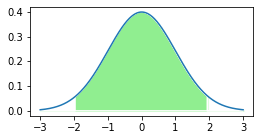

In [ ]:
##  Enter your data #################
mean=0
std=1
P12=0.95
n=None
N=None
############
if not n==None:
  std/=np.sqrt(n)
  if not N==None:
    std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P12,"middle")
x1=stats.norm.ppf((1-P12)/2,loc=mean,scale=std)
print("exact solution: x1 =",x1)
x2=stats.norm.ppf((1+P12)/2,loc=mean,scale=std)
print("exact solution: x2 =",x2)
z1=(x1-mean)/std
z1=np.round(z1,2)
x1=z1*std+mean
print("with rounded z: x1 =",x1)
z2=(x2-mean)/std
z2=np.round(z2,2)
x2=z2*std+mean
print("with rounded z: x2 =",x2)

#8:  Proportions: Find P(pHat < p1) given p1

exact solution: P( X < 0.4368421052631579 )= 0.11687900928944622
with rounded z: P( X < 0.4368421052631579 )= 0.117


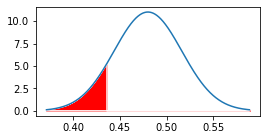

In [ ]:
##  Enter your data #################
p=0.48
n=190
p1=83/190
N=None
############
mean=p
x1=p1
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",x1,None)
print("exact solution: P( X <",x1,")=",stats.norm.cdf(x1,mean,std))
z1=(x1-mean)/std
z1=np.round(z1,2)
print("with rounded z: P( X <",x1,")=",np.round(stats.norm.cdf(z1,0,1),4))

#9: Proportions: Find P(pHat > p2) given p2

exact solution: P( pHat > 0.45 )= 0.03854993587177091
with rounded z: P( X > 0.45 )= 0.0384


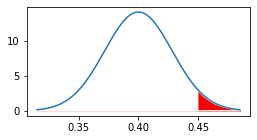

In [ ]:
##  Enter your data #################
p=0.4
n=300
p2=0.45
N=None
############
mean=p
x2=p2
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",None,x2)
print("exact solution: P( pHat >",x2,")=",1-stats.norm.cdf(x2,mean,std))
z2=(x2-mean)/std
z2=np.round(z2,2)
print("with rounded z: P( X >",x2,")=",np.round(1-stats.norm.cdf(z2,0,1),4))

#10: Proportions: Find P(p1 < pHat < p2) given p1 and p2 

exact solution: P( 0.56 < pHat < 0.62 )= 0.834135491398947
with rounded z: P( X < 0.62 )= 0.8348


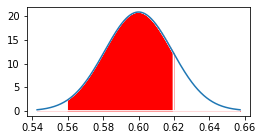

In [ ]:
##  Enter your data #################
p=0.6
n=657
p1=0.56
p2=0.62
N=None
############
mean=p
x1=p1
x2=p2
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
g(mean,std,"red",x1,x2)
print("exact solution: P(",p1,"< pHat <",p2,")=",stats.norm.cdf(x2,mean,std)-stats.norm.cdf(x1,mean,std))
z1=(x1-mean)/std
z1=np.round(z1,2)
z2=(x2-mean)/std
z2=np.round(z2,2)
A1=np.round(stats.norm.cdf(z2,0,1),4)
A2=np.round(stats.norm.cdf(z1,0,1),4)
print("with rounded z: P( X <",x2,")=",np.round((A1-A2),4))

#11: Proportions: Find p1 given P(pHat < p1)

p1 = 0.3926448960815296


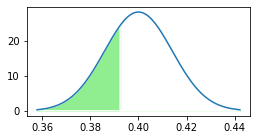

In [ ]:
##  Enter your data #################
P=0.3
p1=348/1200
n=1220
N=None
############
mean=p
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P,"left")
print("p1 =",stats.norm.ppf(P,loc=mean,scale=std))

#12: Proportions: Find p2 given P(pHat > p2)

p2 = 0.15000474170222763


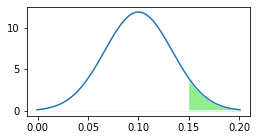

In [ ]:
##  Enter your data #################
P=0.068
p=0.1
n=80
N=None
############
mean=p
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P,"right")
print("p2 =",stats.norm.ppf(1-P,loc=mean,scale=std))

# 13: Proportions: Find p1 and p2  given P(p1 < pHat < p2), where (p1+p2)/2=p

p1 = 0.54962625732433
p2 = 0.6503737426756699


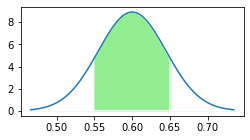

In [ ]:
##  Enter your data #################
P=0.74
p=0.60
n=120
N=None
############
mean=p
std=np.sqrt(p*(1-p)/n)
if not N==None:
  std*=np.sqrt((N-n)/(N-1))
f(mean,std,"lightgreen",P,"midle")
print("p1 =",stats.norm.ppf((1-P)/2,loc=mean,scale=std))
print("p2 =",stats.norm.ppf((1+P)/2,loc=mean,scale=std))

# 14: Graphs of Normal Probability Density Function (PDF) and Normal Cumulative Distribition Function (CDF).

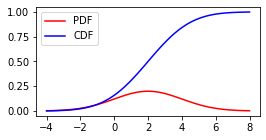

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
##  Enter your data #################
mean=2
std=2
###########
left=mean-3*std
right=mean+3*std
x=np.linspace(left,right,101)
pdf=norm.pdf(x, loc=mean, scale=std)
cdf=norm.cdf(x, loc=mean, scale=std)
plt.plot(x,pdf,'r', label='PDF')
plt.plot(x,cdf,'b', label='CDF')
plt.legend(loc="upper left")
plt.show()

# 15: CDF values.

In [ ]:
from scipy.stats import norm
import numpy as np
##  Enter your data #################
z1=-2.25
z2=-1.75
############
m=4
A1=norm.cdf(z1)# area to the left from z1
A=norm.cdf(z2)
A2=1-norm.cdf(z2)# area to the right from z2
A12=norm.cdf(z2)-norm.cdf(z1) # Area between z1 and z2
print('A1 =',np.round(A1,m))
print('A =',np.round(A,m),'A2 =',np.round(A2,m))
if (z1<z2):
  print('A12 =',A12)

A1 = 0.0122
A = 0.0401 A2 = 0.9599
A12 = 0.02783468420877239


# 16: Inverse *CDF values*.



In [ ]:
from scipy.stats import norm
##  Enter your data #################
A=0.3
################################
z=norm.ppf(A,loc=0,scale=1)
print('z=',z)

z= -0.5244005127080409


# 17: Central Limit Theorem. Build distribution of means of N samples of size n each from uniform random generator



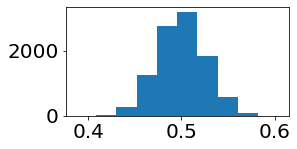

Size= 125
sMean/mu= 0.9995626642465666
s*sqrt(n)/sigma= 1.0002350136068248


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
##  Enter your data #################
n=125
N=10000
##############################
# create N samples of size n
means=[]
for i in range(N):
  s=np.random.uniform(0,1,n)
  means.append(np.mean(s))
mm=np.mean(means)
sig=np.sqrt(np.var(means))
min=mm-3*sig
if min<0: min=0
max=mm+3*sig
if max>1:max=1
bb=np.linspace(min,max,11)
plt.rcParams.update({'font.size': 20})
plt.hist(means)
plt.show()
# To get statistics from your random samples use np.var and np.mean 
print("Size=",n)
print("sMean/mu=",np.mean(means)/0.5)
print("s*sqrt(n)/sigma=",np.sqrt(n*np.var(means))*np.sqrt(12))